# **1. Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **2. Load dataset**

In [2]:
df = pd.read_csv('world_population.csv')

# **3. Basic exploration**

In [3]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (234, 17)


In [4]:
print(f'\nGlimpse of the dataset:')
df.head().style.set_properties(**{'background-color': '#006837', 'color': '#e9c46a', 'border': '1.5px solid black'})


Glimpse of the dataset:


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.058700,1.025700,0.520000
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.870200,0.995700,0.040000
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.853100,1.016400,0.560000
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.477400,0.983100,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.564100,1.010000,0.000000


In [5]:
print(f'Information of the dataset:\n')
print(df.info())

Information of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int6

In [6]:
print('Summary of the dataset:')
df.describe().style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Summary of the dataset:


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34074414.709402,33501070.952991,31729956.243590,29845235.034188,26269468.816239,22710220.790598,18984616.970085,15786908.807692,581449.384615,452.127044,1.009577,0.427051
std,67.694165,136766424.804763,135589876.924439,130404992.751760,124218487.632998,111698206.719070,97832173.346751,81785186.084201,67795091.643236,1761840.864063,2066.121904,0.013385,1.714977
min,1.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,1.000000,0.026100,0.912000,0.000000
25%,59.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,38.417875,1.001775,0.010000
50%,117.500000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,95.346750,1.007900,0.070000
75%,175.750000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,238.933250,1.016950,0.280000
max,234.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,23172.266700,1.069100,17.880000


In [7]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
CCA3,234,234,AFG,1
Country/Territory,234,234,Afghanistan,1
Capital,234,234,Kabul,1
Continent,234,6,Africa,57


In [8]:
print(f'Null values of the dataset:')
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Null values of the dataset:


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Insights**:
- There is no missing value in this dataset.
- We will encode the categorical features into numerical form later.

# **4. Custom palette**

In [9]:
sns.set_style('white')
sns.set(rc={'axes.facecolor': '#d5ce98', 'figure.facecolor': '#d5ce98'})
sns.set_context('poster', font_scale = .7)
palette = ["#006837","#1A9850","#66BD63","#A6D96A","#D9EF8B","#FFFFBF","#FEE08B","#FDAE61","#F46D43","#D73027","#A50026"]
palette_cmap = ["#A50026","#D73027","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#D9EF8B","#A6D96A","#66BD63","#1A9850","#006837"]

# **5. Analysis**

Let's have a look on the population:


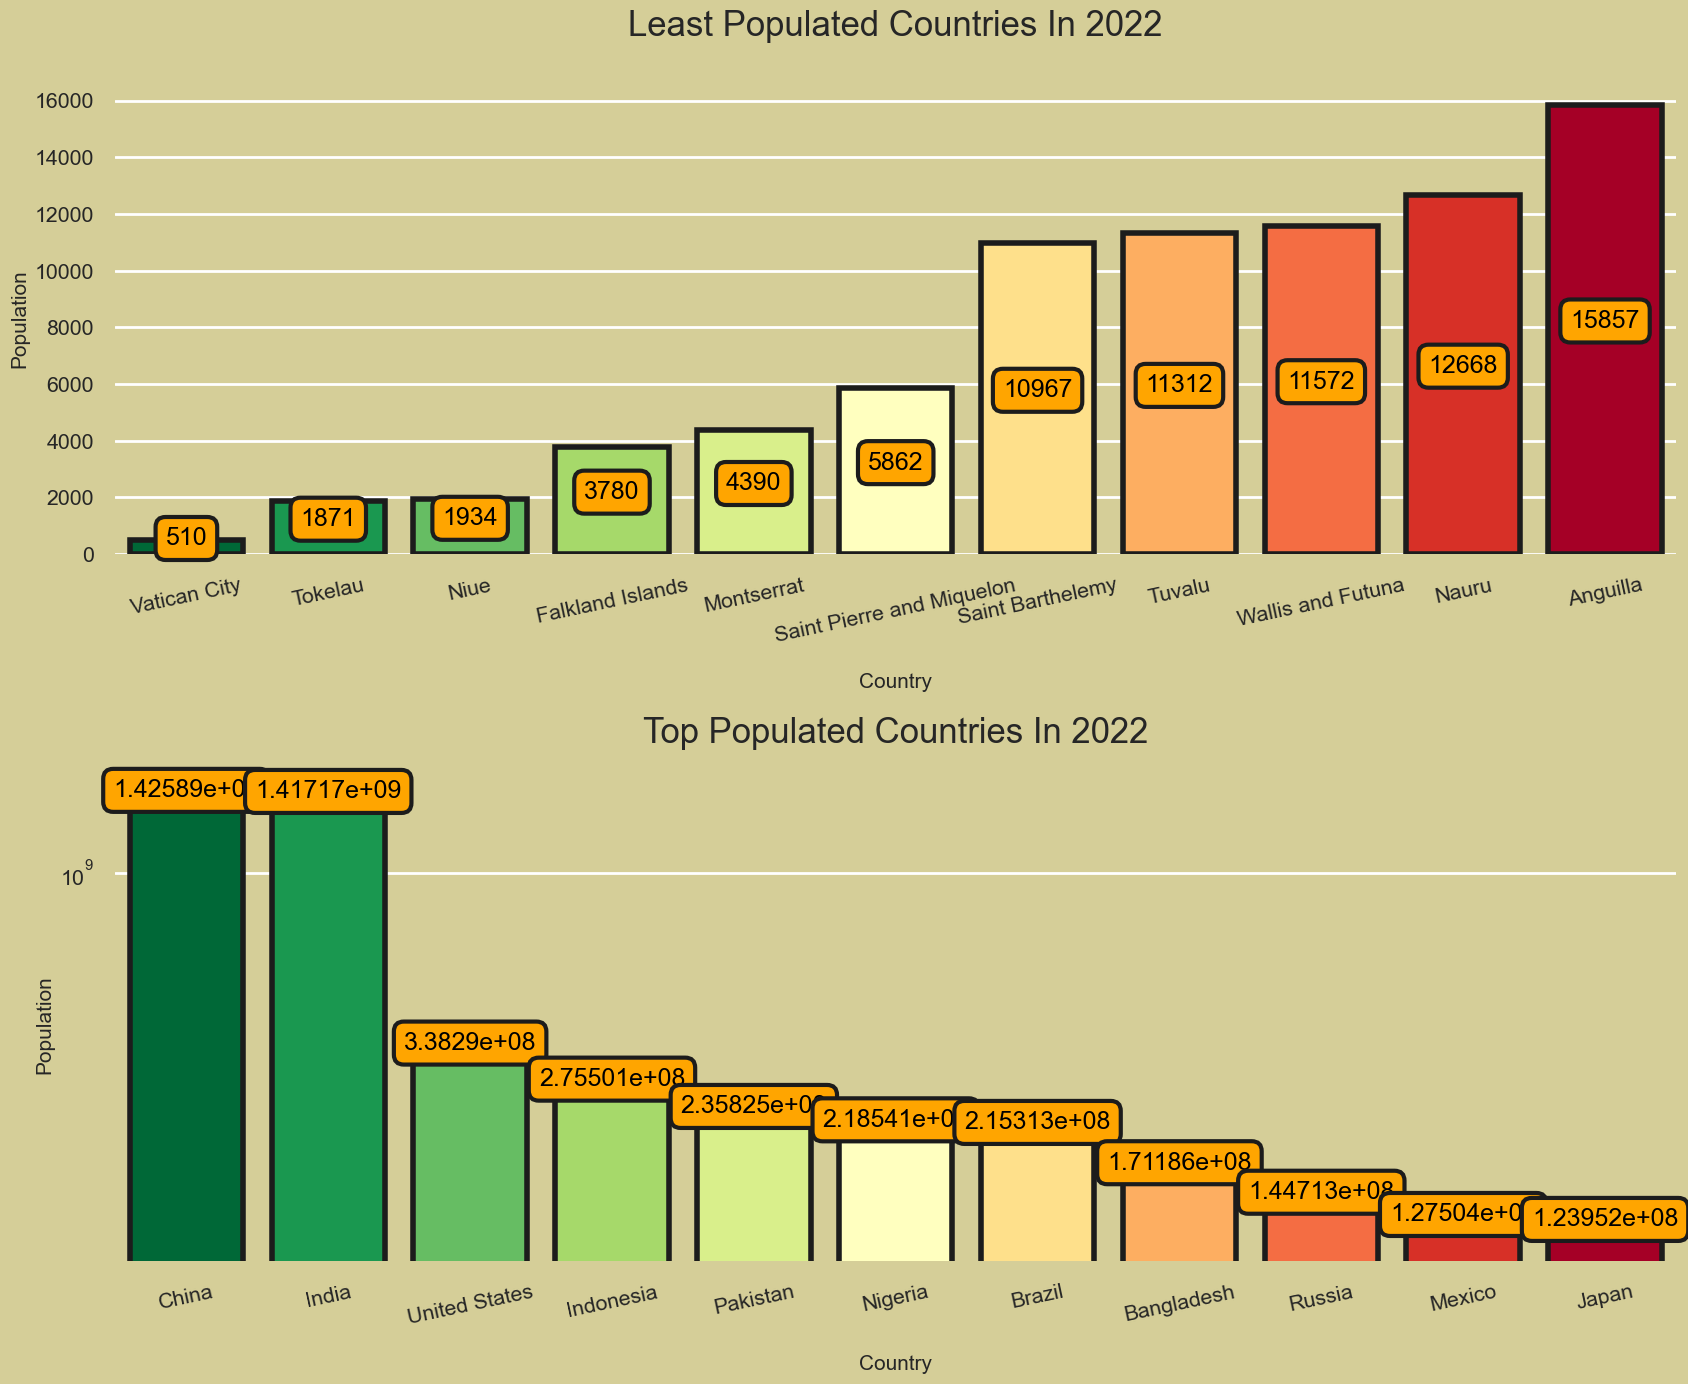

In [10]:
print(f"Let's have a look on the population:")
_, axs = plt.subplots(2, 1, figsize = (20, 16))
plt.tight_layout(pad = 8.0)

sns.barplot(x = df['Country/Territory'], y = df['2022 Population'], order = df.sort_values('2022 Population', ascending = True)['Country/Territory'][:11], ax = axs[0], palette = palette, saturation = 1, edgecolor = '#1c1c1c', linewidth = 4)
axs[0].set_yscale('linear')
axs[0].set_title('Least Populated Countries In 2022\n', fontsize = 25)
axs[0].set_xlabel('\nCountry', fontsize = 15)
axs[0].set_ylabel('Population', fontsize = 15)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 12)
for container in axs[0].containers:
    axs[0].bar_label(container, label_type = 'center', padding = 6, size = 18, color = 'black', rotation = 0,
                     bbox = {'boxstyle': 'round', 'pad': 0.4, 'facecolor': 'orange', 'edgecolor': '#1c1c1c', 'linewidth': 3, 'alpha': 1})
    
sns.barplot(x = df['Country/Territory'], y = df['2022 Population'], order = df.sort_values('2022 Population', ascending = False)['Country/Territory'][:11], ax = axs[1], palette = palette, saturation = 1, edgecolor = '#1c1c1c', linewidth = 4)
axs[1].set_yscale('log')
axs[1].set_title('Top Populated Countries In 2022\n', fontsize = 25)
axs[1].set_xlabel('\nCountry', fontsize = 15)
axs[1].set_ylabel('Population', fontsize = 15)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 12)
for container in axs[1].containers:
    axs[1].bar_label(container, label_type = 'edge', padding = 6, size = 18, color = 'black', rotation = 0,
                     bbox = {'boxstyle': 'round', 'pad': 0.4, 'facecolor': 'orange', 'edgecolor': '#1c1c1c', 'linewidth': 3, 'alpha': 1})

sns.despine(left = True, bottom = True)
plt.show()

### **Insights**:
- China is the most densely populated country with 1.4B people followed by India, USA and others.
- Vatican City is the least populated country with 510 people followed by Tokelau, Niue and others.

Let's have a look on the continent-wise population in 2022:


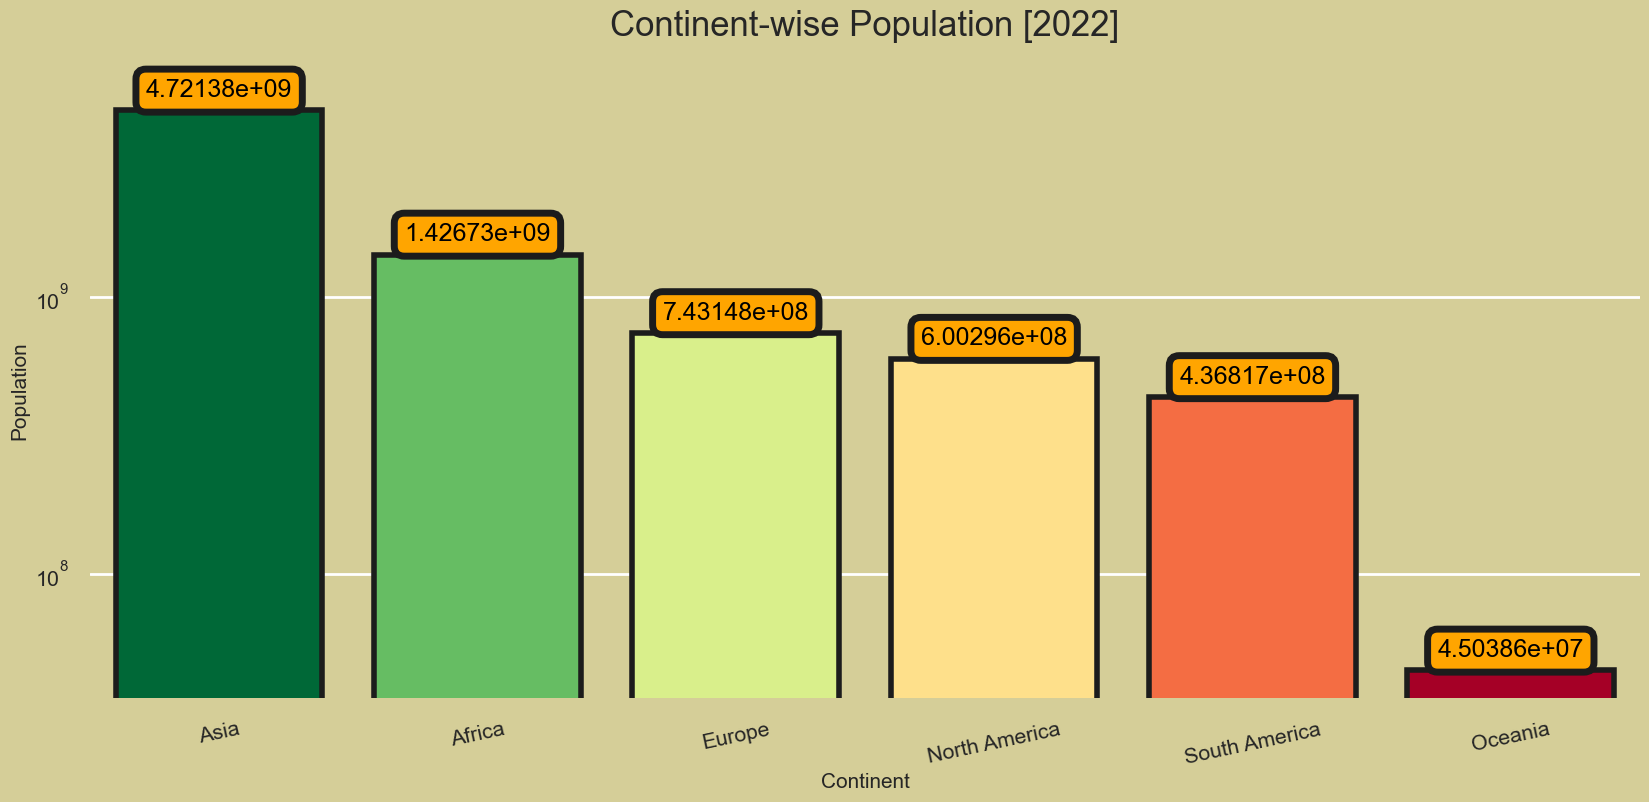

In [11]:
df_pop = df.copy()
df_pop = pd.DataFrame(df_pop.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']].sum())

print("Let's have a look on the continent-wise population in 2022:")
plt.subplots(figsize = (20, 8))
p = sns.barplot(x = df_pop.index, y = df_pop['2022 Population'], order = df_pop.sort_values('2022 Population', ascending = False).index, palette = palette[0:11:2], saturation = 1, edgecolor = '#1c1c1c', linewidth = 4)
p.set_yscale('log')
p.set_title('Continent-wise Population [2022]\n', fontsize = 25)
p.set_xlabel('Continent', fontsize = 15)
p.set_ylabel('Population', fontsize = 15)
p.set_xticklabels(p.get_xticklabels(), rotation = 12)
for container in p.containers:
    p.bar_label(container, label_type = 'edge', padding = 6, size = 18, color = 'black', rotation = 0, bbox = {'boxstyle': 'round', 'pad': 0.4, 'facecolor': 'orange', 'edgecolor': '#1c1c1c', 'linewidth': 5, 'alpha': 1})

sns.despine(left = True, bottom = True)
plt.show()

### **Insights**:
- Asia is the most densely populated continent with 4.7B people followed by Africa, Europe and others.

Let's have a look on the ratios of continent-wise population in 2022:


Text(0.5, 1.0, '\nContinent-wise Population Ratio [2022]')

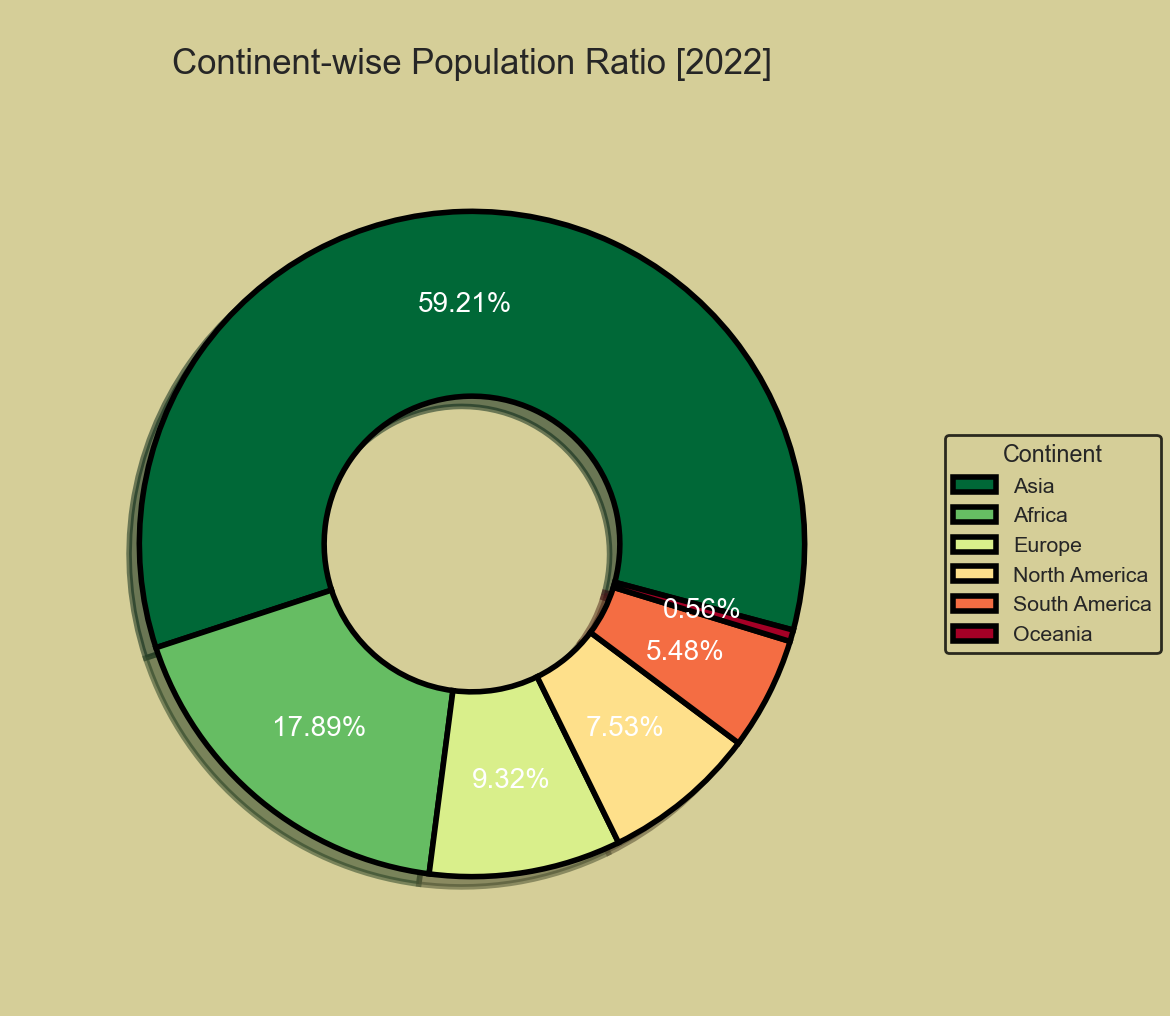

In [12]:
print(f"Let's have a look on the ratios of continent-wise population in 2022:")
plt.subplots(figsize = (12 , 12))

labels = 'Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania'
size = 0.5

wedges, texts, autotexts = plt.pie(df_pop.sort_values("2022 Population", ascending = False)["2022 Population"].values, explode = (0, 0, 0, 0, 0, 0), textprops = dict(size = 20, color = "white"), autopct = "%.2f%%", pctdistance = 0.72, radius = .9, colors = palette[0:11:2], shadow = True, wedgeprops = dict(width = size, edgecolor = "black", linewidth = 4), startangle = -15)

plt.legend(wedges, labels, title = "Continent", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nContinent-wise Population Ratio [2022]", fontsize = 25)

### **Insights**:

In world population 59.21% from Asia, 17.89% from Africa, 9.32% from Europe, 7.53% from North America, 5.48% from South America and 0.56% from Oceania.

In [13]:
print("Population in Asia in 2022:")
fig = px.choropleth(data_frame = df,
                    locations = "Country/Territory", locationmode = "country names", color = "2022 Population",
                    color_continuous_scale = palette[:10], height = 600, scope = "asia",
                    labels = {"2022 Population": "Population"})

fig.update_layout(title = dict(text = "Population In Asia [2022]",
                          y = 0.95, x = 0.5, xanchor = "center", yanchor = "top", font_color = "black"),
                          margin = dict(l = 0, r = 0, b = 0, t = 0),
                          geo_bgcolor = "#d5ce98",
                          paper_bgcolor = "#d5ce98")

fig.show()

Population in Asia in 2022:


Population in Asia in 2022:


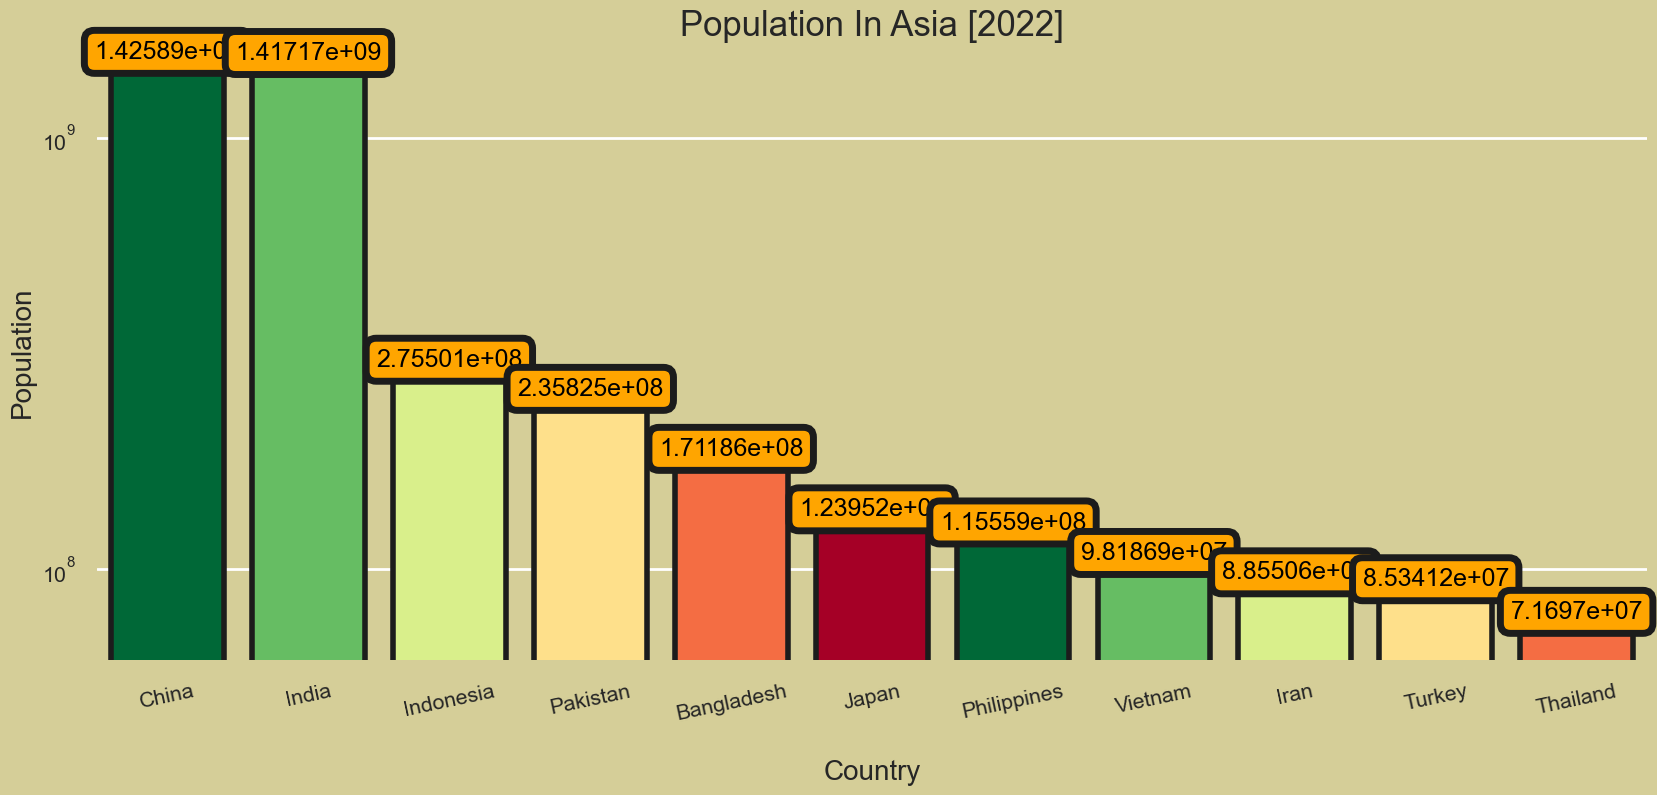

In [15]:
print("Population in Asia in 2022:")
plt.subplots(figsize = (20, 8))
p = sns.barplot(data = df[df["Continent"] == "Asia"], x = "Country/Territory", y = "2022 Population", order = df[df["Continent"] == "Asia"].sort_values("2022 Population", ascending = False)["Country/Territory"][:11], palette = palette[0:11:2], saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Asia [2022]", fontsize = 25)
p.set_xlabel("\nCountry", fontsize = 20)
p.set_ylabel("Population", fontsize = 20)
p.set_xticklabels(p.get_xticklabels(), rotation = 12)
for container in p.containers:
    p.bar_label(container, label_type = "edge", padding = 6, size = 18, color = "black", rotation = 0,
                bbox = {"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 5, "alpha": 1})
sns.despine(left = True, bottom = True)
plt.show()

### **Insights**:
- China is leading in Asia with 1.42B people followed by India, Indonesia and other countries.

In [25]:
print("Population in Africa in 2022:")
fig = px.choropleth(data_frame = df,
                    locations = "Country/Territory", locationmode = "country names", color = "2022 Population",
                    color_continuous_scale = palette[:10], height = 600, scope = "africa",
                    labels = {"2022 Population": "Population"})
fig.update_layout(title = dict(text = "Population In Africa [2022]",
                               y = 0.98, x = 0.5, xanchor = "center", yanchor = "top", font_color = "black"),
                               margin = dict (l = 0, r = 0, b = 0, t = 0),
                               geo_bgcolor = "#d5ce98",
                               paper_bgcolor = '#d5ce98')
fig.show()

Population in Africa in 2022:
